In [28]:

from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


In [29]:

sales_df = pd.read_csv('Book1.csv')
 
# sales_df['y_orig']=sales_df.y # We want to save the original data for later use
# #sales_df.replace([np.inf, -np.inf], np.nan)
# #sales_df['y'] = np.log(sales_df['y']) #take the log of the data to remove trends, etc
 
# model = Prophet()
# model.fit(sales_df);
 
# #create 12 months of future data
# future_data = model.make_future_dataframe(periods=12, freq = 'm')
 
# #forecast the data for future data
# forecast_data = model.predict(future_data)

In [30]:
sales_df.head()

,ds,y
0,2017-06-15,1
1,2017-06-15,1
2,2017-06-15,0
3,2017-06-15,1
4,2017-06-15,0


In [33]:
sales_df['ds'].head()

0    2017-06-15
1    2017-06-15
2    2017-06-15
3    2017-06-15
4    2017-06-15
Name: ds, dtype: object

In [34]:
sales_df.index

RangeIndex(start=0, stop=200000, step=1)

In [35]:
sales_df.set_index('ds', inplace=True)

In [36]:
sales_df.head()

,y
ds,
2017-06-15,1
2017-06-15,1
2017-06-15,0
2017-06-15,1
2017-06-15,0


In [37]:
sales_df['ds'] = pd.to_datetime(sales_df['ds'], errors='coerce')

KeyError: 'ds'

In [26]:
per = sales_df.ds.dt.to_period("M")  # new way to get the same

data_df = sales_df.groupby(per)

data_df=data_df.sum()

AttributeError: 'DataFrame' object has no attribute 'ds'

In [70]:
data_df.head()

,y
ds,
2016-12,29
2017-01,7061
2017-02,7979
2017-03,6127
2017-04,1728


In [59]:
#data_df.index()
data_df.set_index('ds', inplace=True)

KeyError: 'ds'

In [58]:
data_df['ds']


KeyError: 'ds'

In [35]:

data_df['y_orig']=data_df.y # We want to save the original data for later use
#sales_df.replace([np.inf, -np.inf], np.nan)
data_df['y'] = np.log(data_df['y']) #take the log of the data to remove trends, etc
 
model = Prophet()
model.fit(data_df);
 
#create 12 months of future data
future_data = model.make_future_dataframe(periods=3, freq = 'M')
 
#forecast the data for future data
forecast_data = model.predict(future_data)

ValueError: Dataframe must have columns 'ds' and 'y' with the dates and values respectively.

In [ ]:
forecast_data.tail()

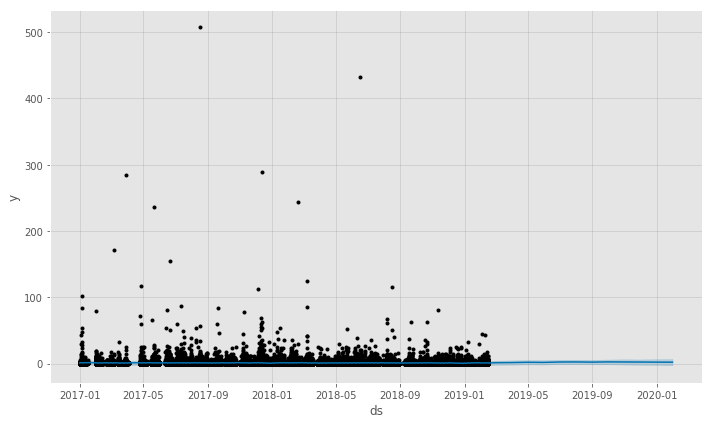

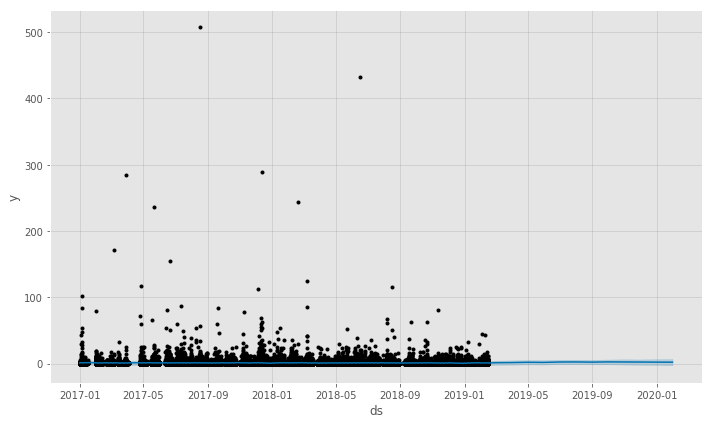

In [13]:
model.plot(forecast_data)

In [24]:

# sales_df.set_index('y', inplace=True)
# forecast_data.set_index('y', inplace=True)
# #viz_df = sales_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
# #del viz_df['y']
# #del viz_df['ds']

In [20]:


sales_df.index = pd.to_datetime(sales_df.index)
last_date = sales_df.index[-1]

In [27]:
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
# Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(sales_df.y_orig)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
  



# change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot